In [1]:
from zipfile import ZipFile

dataset_train = r"C:\Users\Rutuja\Documents\Prodigy\Prodigy_ML_03\archive (8).zip"
    
with ZipFile(dataset_train, 'r') as zip:
    zip.extractall('Dataset/')


In [2]:
import os
import numpy as np
import cv2
from zipfile import ZipFile
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define the path for the zip file
zip_file_path = r"C:\Users\Rutuja\Documents\Prodigy\Prodigy_ML_03\archive (8).zip"

# Extract the dataset
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(r"C:\Users\Rutuja\Documents\Prodigy\Prodigy_ML_03")  # Adjust this path as needed

# Define paths for training and testing datasets
train_dir = r"C:\Users\Rutuja\Documents\Prodigy\Prodigy_ML_03\Dataset\dataset\training_set"
test_dir = r"C:\Users\Rutuja\Documents\Prodigy\Prodigy_ML_03\Dataset\dataset\test_set"


In [4]:
# Initialize lists to hold image data and labels
features = []
labels = []
image_size = (50, 50)  # Resize images to this size

# Load and preprocess training images
for category in ['cats', 'dogs']:
    category_path = os.path.join(train_dir, category)
    for image_name in tqdm(os.listdir(category_path), desc=f"Processing {category} Images"):
        image_path = os.path.join(category_path, image_name)
        image_read = cv2.imread(image_path)
        if image_read is None:
            print(f"Error loading image: {image_path}")
            continue
        image_resized = cv2.resize(image_read, image_size)
        image_normalized = image_resized / 255.0  # Normalize the image
        features.append(image_normalized.flatten())  # Flatten the image
        labels.append(0 if category == 'cats' else 1)  # Label cats as 0 and dogs as 1

Processing cats Images:   0%|          | 1/4000 [00:00<06:51,  9.72it/s]

Processing dogs Images: 100%|██████████| 4000/4000 [02:03<00:00, 32.41it/s]


In [5]:
# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [8]:
from sklearn.decomposition import PCA


In [9]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [10]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca, y_train)

SVC(kernel='linear')

In [11]:
y_pred = svm_model.predict(X_test_pca)


In [12]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.52      0.56      0.54       804
           1       0.51      0.48      0.49       796

    accuracy                           0.52      1600
   macro avg       0.52      0.52      0.52      1600
weighted avg       0.52      0.52      0.52      1600



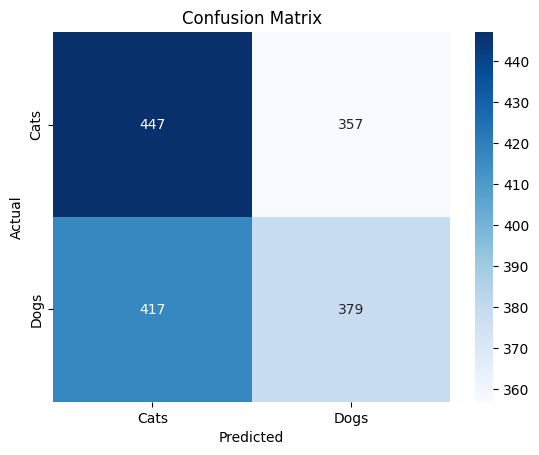

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cats', 'Dogs'], yticklabels=['Cats', 'Dogs'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
plt.figure(figsize=(10, 6))
h = .02 

<Figure size 1000x600 with 0 Axes>

In [15]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [16]:
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

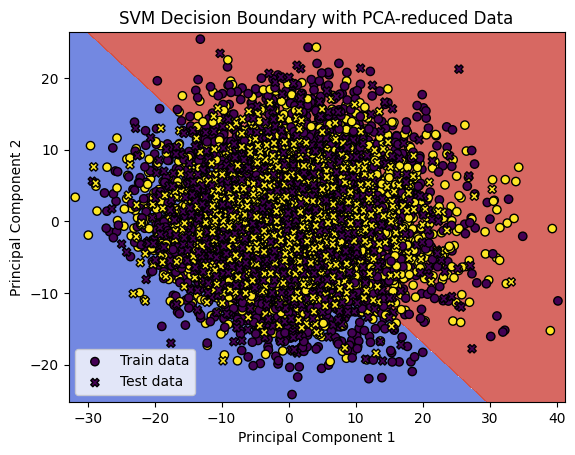

In [17]:
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', label='Train data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', marker='X', label='Test data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA-reduced Data')
plt.legend()
plt.show()

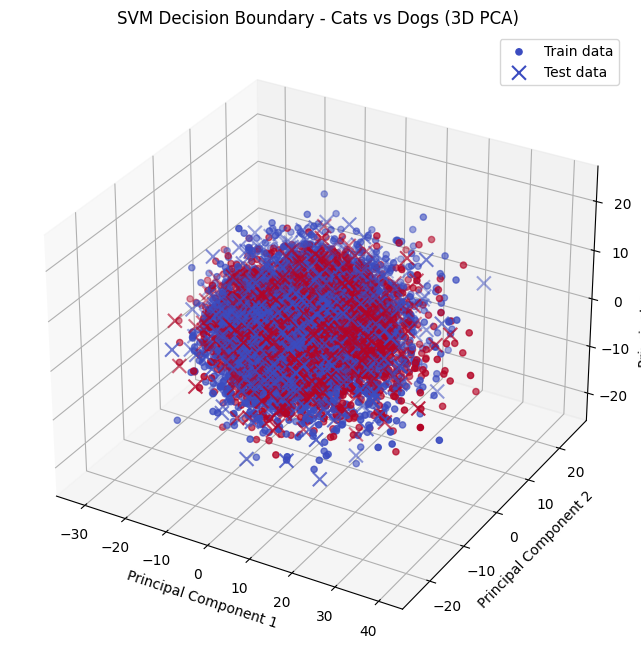

In [47]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce to 3D
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM with an RBF kernel
svm_model = SVC(kernel='rbf', gamma='auto')
svm_model.fit(X_train_pca, y_train)

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='coolwarm', marker='o', label='Train data')
ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], c=y_test, cmap='coolwarm', marker='x', s=100, label='Test data')

ax.set_title('SVM Decision Boundary - Cats vs Dogs (3D PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()
